<a href="https://colab.research.google.com/github/luongdo94/Data-Sciences/blob/main/Top_richest_persons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df = pd.read_csv("/content/drive/MyDrive/data/World_Billionaire_2024.csv", header=1)

In [14]:
df.head(3)

,RANK,COMPANY,EXECUTIVE NAME,NET WORTH,COUNTRY
0,1,"Tesla, SpaceX",Elon Musk,$212.3 B,United States
1,2,Amazon,Jeff Bezos,$203.5 B,United States
2,3,LVMH,Bernard Arnault & family,$194.3 B,France


In [15]:
df.columns=df.columns.map(lambda x: x.replace(" ", "_").lower())

In [24]:
df.net_worth=df.net_worth.map(lambda x: x.replace("$", ""))
df.net_worth=df.net_worth.map(lambda x: x.replace("B", ""))

In [25]:
df.head(3)

,rank,company,executive_name,net_worth,country
0,1,"Tesla, SpaceX",Elon Musk,212.3,United States
1,2,Amazon,Jeff Bezos,203.5,United States
2,3,LVMH,Bernard Arnault & family,194.3,France


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2742 entries, 0 to 2741
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   rank            2742 non-null   int64 
 1   company         2739 non-null   object
 2   executive_name  2742 non-null   object
 3   net_worth       2742 non-null   object
 4   country         2742 non-null   object
dtypes: int64(1), object(4)
memory usage: 107.2+ KB


In [31]:
df.net_worth=df.net_worth.astype(np.float64)

In [37]:
#fillna by most frequent
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan, strategy="most_frequent")
df.iloc[:, 1:2] = imputer.fit_transform(df.iloc[:, 1:2])


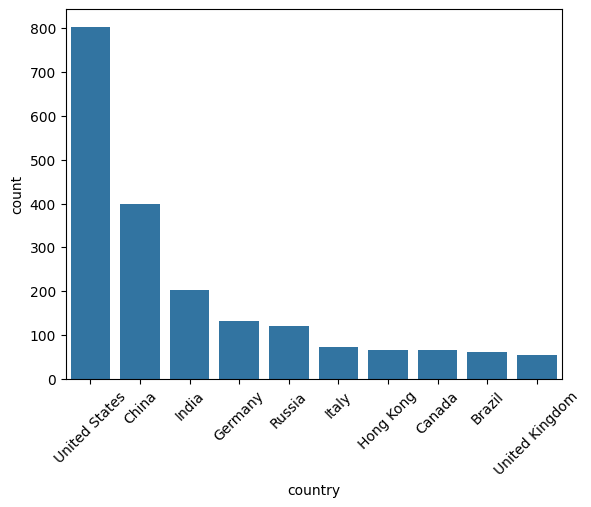

In [45]:
top10_ct=df.country.value_counts().index[:10]
sns.countplot(data=df, x="country", order=top10_ct)
plt.xticks(rotation=45);